In [13]:
import pandas as pd
import numpy as np
import os

In [14]:
# smape: symmetric mean absolute percentage error
# mape: mean absolute percentage error
# mase: mean absolute scaled error
# owa: overall weighted average

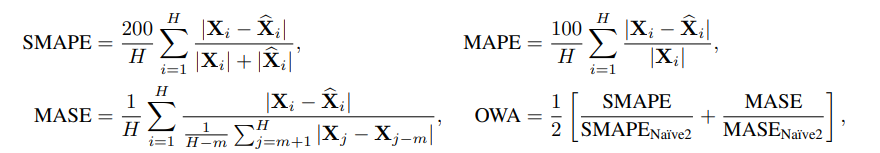

In [15]:
freqs = ['Hourly', 'Daily', 'Weekly', 'Monthly', 'Quarterly', 'Yearly']
path = '/data/coding/chaochuan/TSGym/test_resultsGym'
model_list = os.listdir(path)
model_list = list(set([_.replace('_fit_time_per_epoch', '').replace('.npz', '') for _ in model_list if _.endswith('.npz') ]))
model_list = [m for m in model_list if all(k not in m for k in freqs)]
print(model_list)

['m4_TransformerGym_None_positional-encoding_self-attention', 'm4_TransformerGym_stationary_series-patching_sparse-attention', 'm4_TransformerGym_None_positional-encoding_sparse-attention', 'm4_TransformerGym_None_series-patching_sparse-attention', 'm4_TransformerGym_stationary_positional-encoding_self-attention', 'm4_TransformerGym_stationary_series-patching_self-attention', 'm4_TransformerGym_stationary_series-patching_destationary-attention', 'm4_TransformerGym_None_series-patching_self-attention', 'm4_TransformerGym_stationary_positional-encoding_sparse-attention', 'm4_TransformerGym_stationary_positional-encoding_destationary-attention', 'm4_TransformerGym_None_positional-encoding_destationary-attention', 'm4_TransformerGym_None_series-patching_destationary-attention']


In [21]:
metric = 'smape'
result_dict, time_dict = {}, {}
for model in model_list:
    time_dict[model] = {}
    try:
        result = np.load(f'{path}/{model}.npz', allow_pickle=True)
        # for freq in freqs:
        #     fit_time_per_epoch = np.load(f"{path}/{model.replace('m4', f'm4_{freq}')}_fit_time_per_epoch.npz", allow_pickle=True)
        #     time_dict[model][freq] = fit_time_per_epoch['time'].item()
    except Exception as error:
        print(f'error while fitting model: {model}')
        pass
        continue
    
    result_dict[model] = result[metric].item()

In [22]:
df_result = pd.DataFrame.from_dict(result_dict, orient='index')
df_time = pd.DataFrame.from_dict(time_dict, orient='index')

In [23]:
df_result

,Yearly,Quarterly,Monthly,Others,Average
m4_TransformerGym_None_positional-encoding_self-attention,69.467,73.854,69.729,106.259,72.485
m4_TransformerGym_stationary_series-patching_sparse-attention,15.832,16.215,18.924,6.426,16.938
m4_TransformerGym_None_positional-encoding_sparse-attention,69.416,74.001,70.071,106.238,72.672
m4_TransformerGym_None_series-patching_sparse-attention,NaN,NaN,NaN,NaN,NaN
m4_TransformerGym_stationary_positional-encoding_self-attention,17.299,16.119,14.804,7.452,15.326
m4_TransformerGym_stationary_series-patching_self-attention,15.923,13.682,18.963,7.703,16.433
m4_TransformerGym_stationary_series-patching_destationary-attention,15.923,13.682,18.963,7.703,16.433
m4_TransformerGym_None_series-patching_self-attention,NaN,NaN,NaN,NaN,NaN
m4_TransformerGym_stationary_positional-encoding_sparse-attention,16.121,13.009,15.669,7.033,14.703
m4_TransformerGym_stationary_positional-encoding_destationary-attention,17.299,16.119,14.804,7.452,15.326


In [ ]:
df_time

""


: 

In [20]:
df_result_avg = df_result['Average']
df_time_avg = ((df_time - df_time.mean(axis=0)) / df_time.std(axis=0) + 10).mean(axis=1)

df_result_avg * df_time_avg

KeyError: 'Average'